In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


Dataset Overview:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.369007e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.500885e-15 -5.620335e-16  1.149614e-16 -2.426963e-15   
std    1.380247e+00  1.3

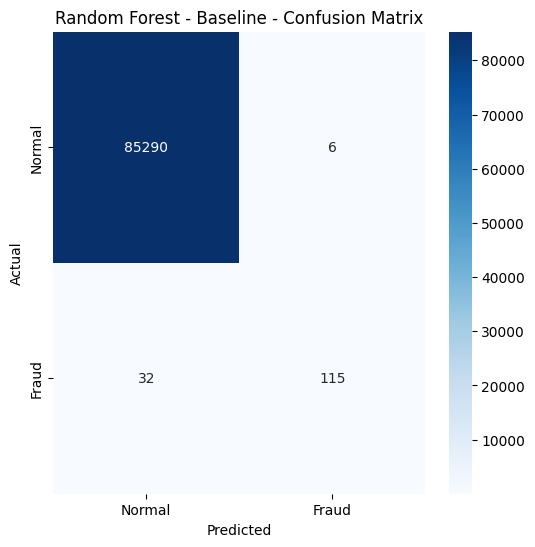

Random Forest - Undersampling:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.08      0.89      0.15       147

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.57     85443
weighted avg       1.00      0.98      0.99     85443

Confusion Matrix:
 [[83803  1493]
 [   16   131]]


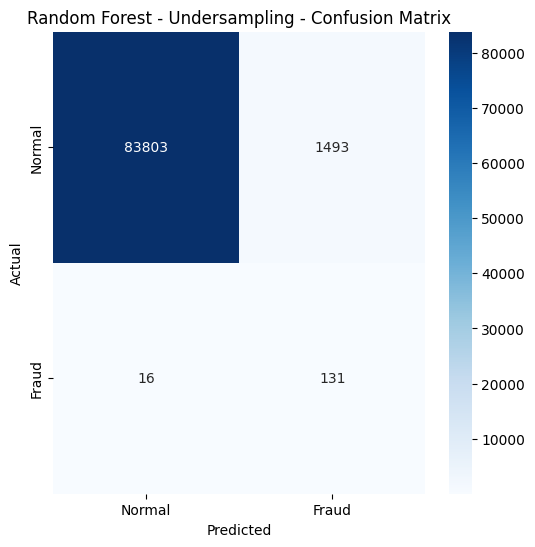

Random Forest - Oversampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.85      0.81      0.83       147

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85275    21]
 [   28   119]]


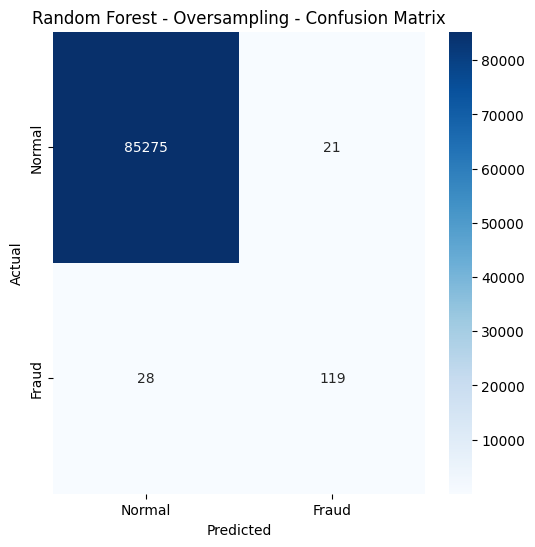

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline

# Load dataset
data_path = '/kaggle/input/creditcardfraud/creditcard.csv'  # Change path if running locally
if os.path.exists(data_path):
    data = pd.read_csv(data_path)
else:
    raise FileNotFoundError("Dataset not found! Check the path.")

# Handle missing values
data.fillna(0, inplace=True)

# Display dataset info
print("Dataset Overview:")
print(data.describe())
print(f"Valid transactions: {len(data[data['Class'] == 0])}")
print(f"Fraud transactions: {len(data[data['Class'] == 1])}")

# Splitting dataset
y = data['Class']
X = data.drop(columns=['Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

def train_and_evaluate(model, X_train, X_test, y_train, y_test, title="Model Performance"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"{title}:")
    print(classification_report(y_test, y_pred))
    conf_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_mat)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Model 1: Random Forest (Baseline)
rf_baseline = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0, max_depth=10)
train_and_evaluate(rf_baseline, X_train, X_test, y_train, y_test, "Random Forest - Baseline")

# Model 2: Random Forest with Undersampling
undersampler = RandomUnderSampler()
pipeline_under = Pipeline([('undersample', undersampler), ('RF', rf_baseline)])
train_and_evaluate(pipeline_under, X_train, X_test, y_train, y_test, "Random Forest - Undersampling")

# Model 3: Random Forest with Oversampling
oversampler = RandomOverSampler()
pipeline_over = Pipeline([('oversample', oversampler), ('RF', rf_baseline)])
train_and_evaluate(pipeline_over, X_train, X_test, y_train, y_test, "Random Forest - Oversampling")

# Model 4: Random Forest with SMOTE
smote_sampler = SMOTE(sampling_strategy='auto', random_state=0)
pipeline_smote = Pipeline([('SMOTE', smote_sampler), ('RF', rf_baseline)])
train_and_evaluate(pipeline_smote, X_train, X_test, y_train, y_test, "Random Forest - SMOTE")
